In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('crop_yield.csv')

In [4]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
df.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,rainfall_mm,temperature_celsius,days_to_harvest,yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [9]:
df.columns


Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [24]:
print(df.columns.tolist())


['region', 'soil_type', 'crop', 'rainfall_mm', 'temperature_celsius', 'fertilizer_used', 'irrigation_used', 'weather_condition', 'days_to_harvest', 'yield_tons_per_hectare']


In [25]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check again
print(df.columns.tolist())


['region', 'soil_type', 'crop', 'rainfall_mm', 'temperature_celsius', 'fertilizer_used', 'irrigation_used', 'weather_condition', 'days_to_harvest', 'yield_tons_per_hectare']


In [27]:
df['fertilizer_used'] = df['fertilizer_used'].astype(int)
df['irrigation_used'] = df['irrigation_used'].astype(int)
df.head()


,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


In [30]:
df['region'].value_counts()
df['crop'].value_counts()
df['soil_type'].value_counts()
df['weather_condition'].value_counts()

weather_condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64

In [32]:
#Encoding catagorical columns.
df['region'] = df['region'].map({
    'North': 0,
    'West': 1,
    'South': 2,
    'East': 3
})

df['crop'] = df['crop'].map({
    'Maize': 0,
    'Rice': 1,
    'Barley': 2,
    'Wheat': 3,
    'Cotton': 4,
    'Soybean': 5
})

df['soil_type'] = df['soil_type'].map({
    'Sandy': 0,
    'Loam': 1,
    'Chalky': 2,
    'Silt': 3,
    'Clay': 4,
    'Peaty': 5
})

df['weather_condition'] = df['weather_condition'].map({
    'Sunny': 0,
    'Rainy': 1,
    'Cloudy': 2
})

In [33]:
df.head()

,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_tons_per_hectare
0,1,0,4,897.077239,27.676966,0,1,2,122,6.555816
1,2,4,1,992.673282,18.026142,1,1,1,140,8.527341
2,0,1,2,147.998025,29.794042,0,0,0,106,1.127443
3,0,0,5,986.866331,16.644190,0,1,1,146,6.517573
4,2,3,3,730.379174,31.620687,1,1,2,110,7.248251


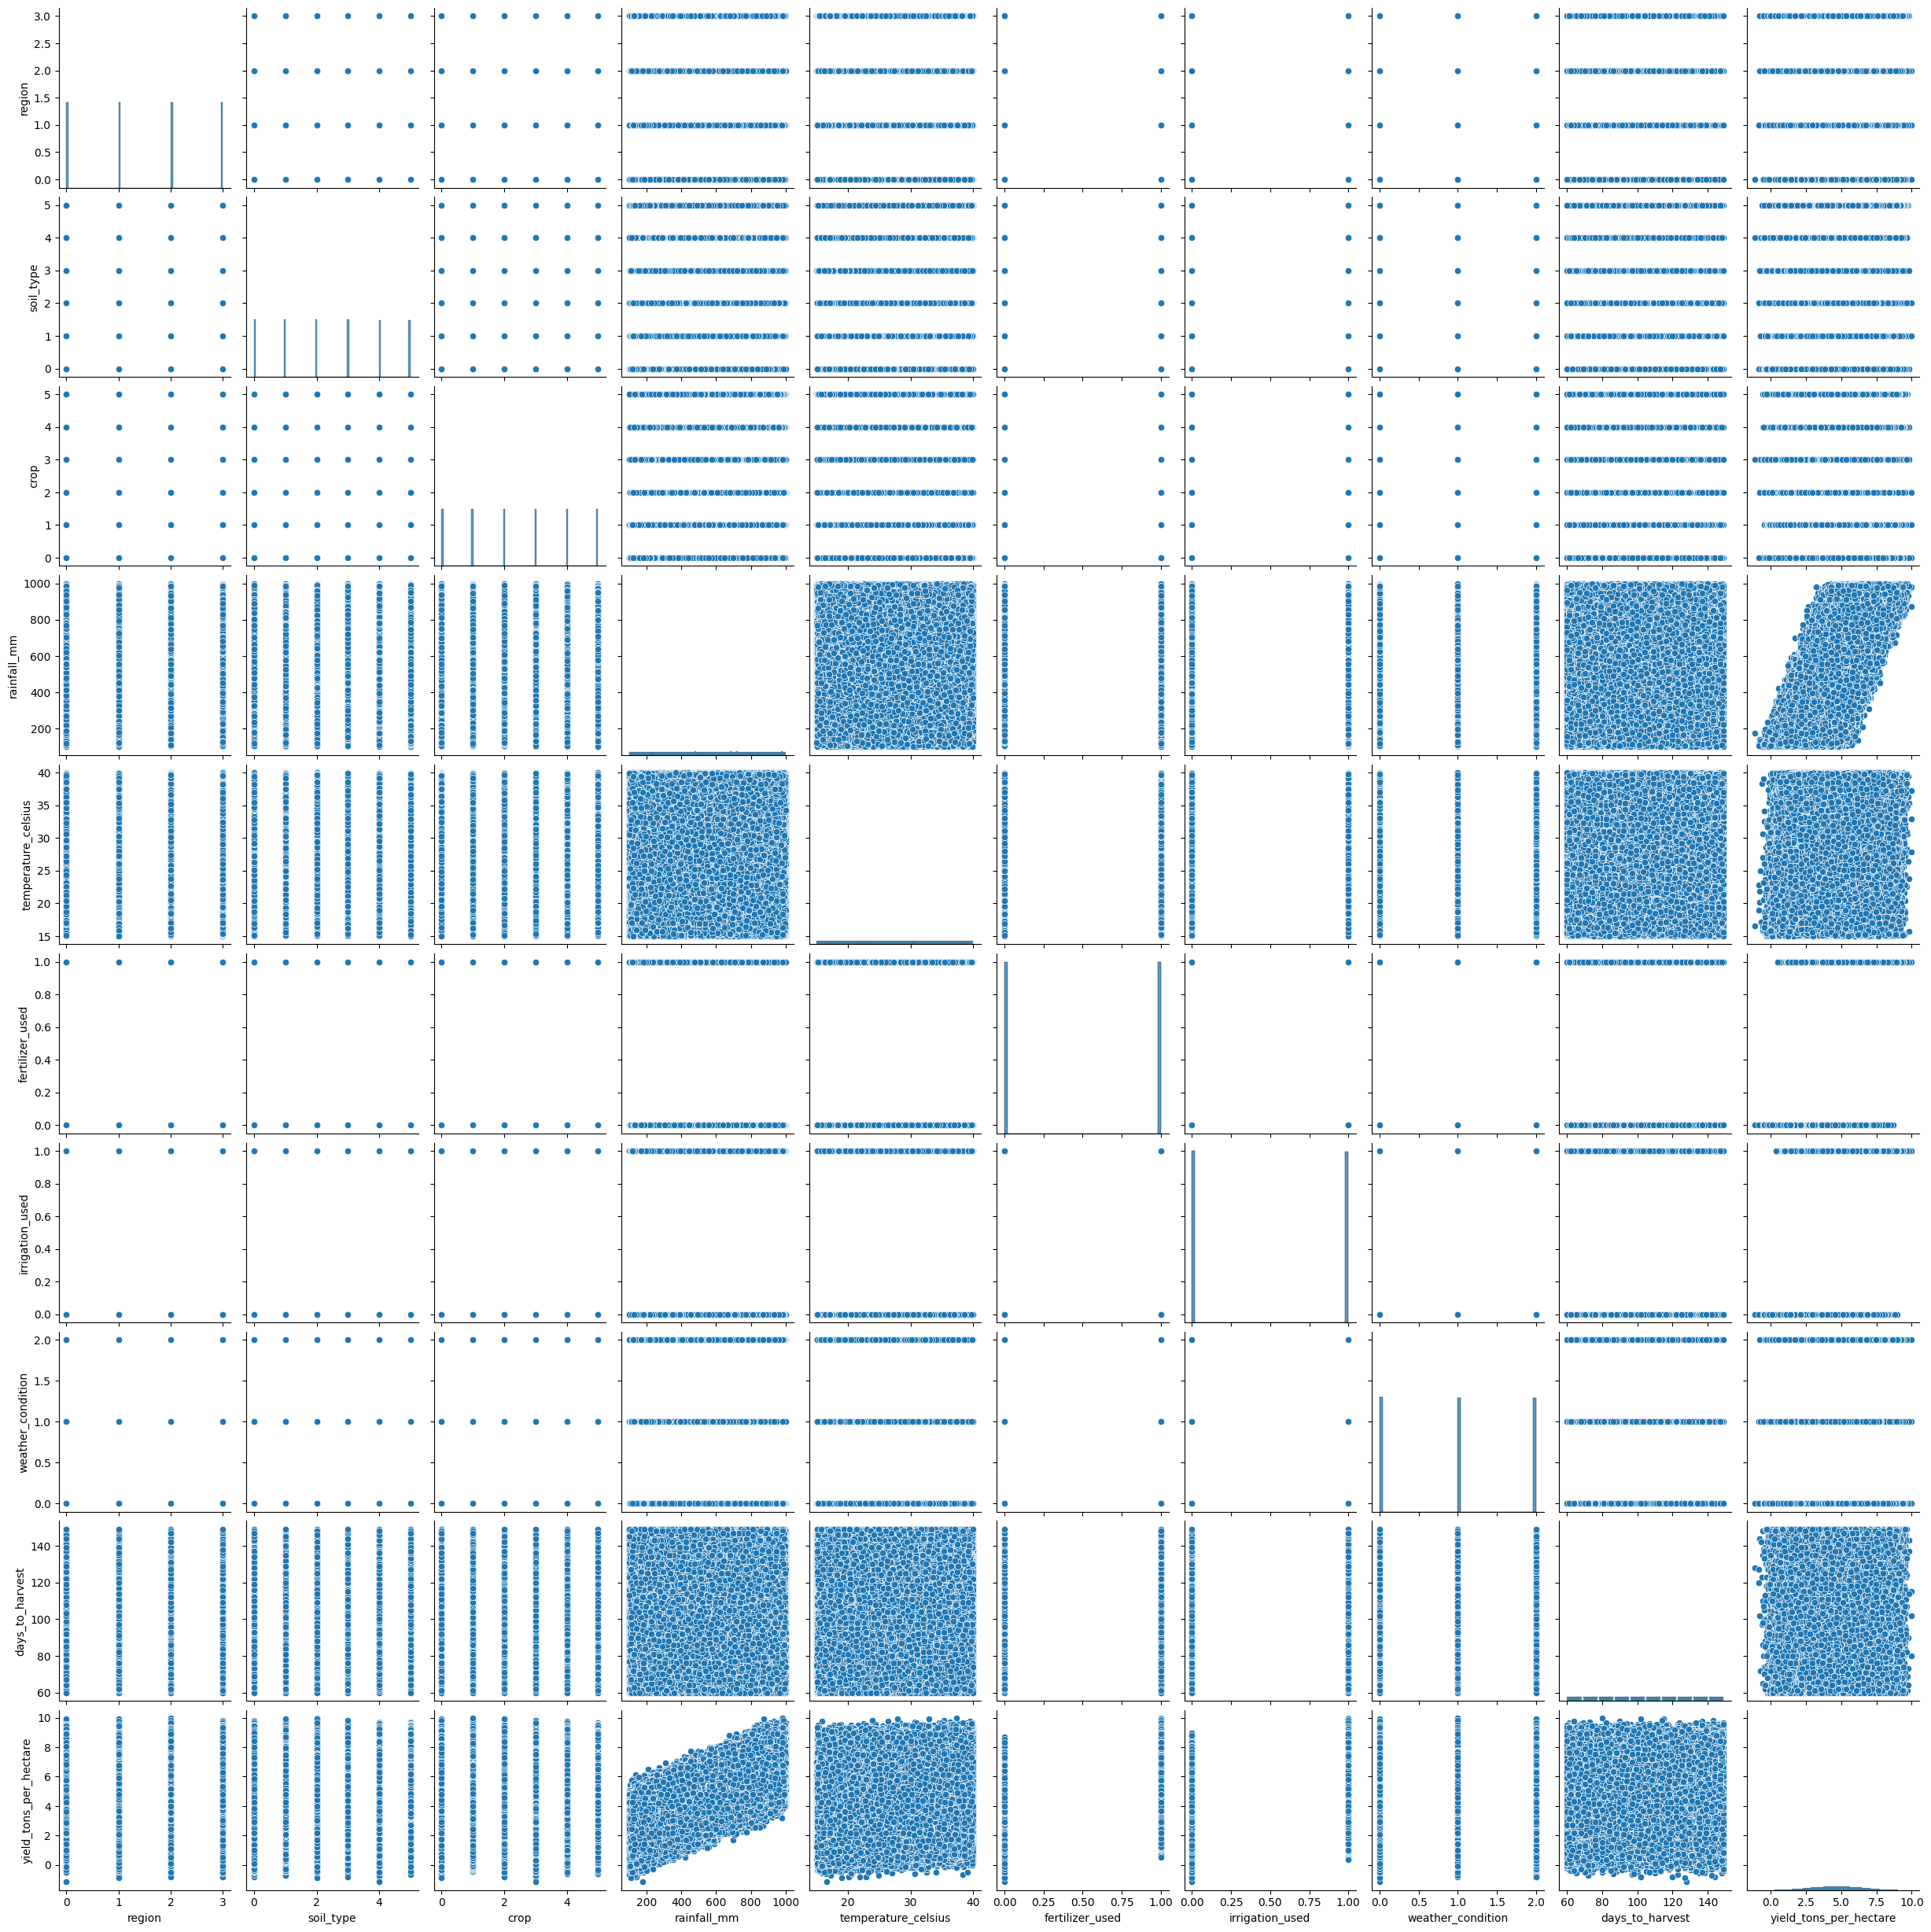

In [34]:
sns.pairplot(data = df)

In [35]:
df.skew()

region                    0.000788
soil_type                 0.002007
crop                      0.001090
rainfall_mm              -0.000934
temperature_celsius      -0.000534
fertilizer_used           0.000240
irrigation_used           0.002036
weather_condition         0.002096
days_to_harvest           0.000033
yield_tons_per_hectare   -0.000862
dtype: float64

<Axes: >

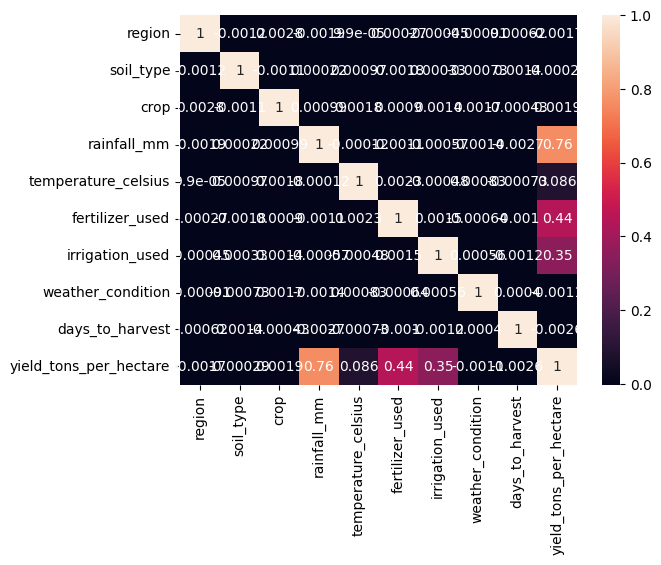

In [36]:
sns.heatmap(df.corr(),annot=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
X = df.drop(['yield_tons_per_hectare'],axis=1)
y = df['yield_tons_per_hectare']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
x_train.shape

(800000, 9)

In [43]:
x_test.shape

(200000, 9)

In [44]:
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('r2_score:', r2_score(y_pred,y_test))

r2_score: 0.9045421947582892


In [45]:
import xgboost

xg = xgboost.XGBRFRegressor()

xg.fit(x_train,y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [46]:
y_pred1 = xg.predict(x_test)

print('r2_score:',r2_score(y_pred1,y_test))

r2_score: 0.8944425668007475


In [47]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 2]
}

In [49]:
!pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 808.1 kB/s eta 0:06:51
   ---------------------------------------- 0.8/332.0 MB 812.8 kB/s eta 0:06:48
   ---------------------------------------- 1.0/332.0 MB 906.9 kB/s eta 0:06:05
   ---------------------------------------- 1.3/332.0 MB 1.0 MB/s eta 0:05:22
   ---------------------------------------- 1.3/332.0 MB 1.0 MB/s eta 0:05:22
   ---------------------------------------- 1.6/332.0 MB 915.3 kB/s eta 0:06:02
   ---------------------------------------- 1.6/332.0 MB 915.3 kB/s eta 0:06:02
   ---------------------------------------- 1.8/332.0 MB 880.7 kB/s eta 0:06:15
   --------------

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\klvic\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(10,)),   # 👈 define input shape here
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 1.1710 - val_loss: 0.2717
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - loss: 0.3314 - val_loss: 0.2867
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 73s 4ms/step - loss: 0.2865 - val_loss: 0.2504
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.2711 - val_loss: 0.2587
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.2646 - val_loss: 0.2546
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.2613 - val_loss: 0.2510
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.2604 - val_loss: 0.2529
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.2593 - val_loss: 0.2497
Epoch 9/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - loss: 0.2588 - val_loss: 0.2729
Epoch 10/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.2587 - val_loss: 0.2497


In [54]:
y_pred = model.predict(x_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [55]:
r2_score(y_test,y_pred)

0.9127871770861682

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, max_depth=6)

rf.fit(x_train,y_train)

y_pred2 = rf.predict(x_test)
r2_score(y_pred2,y_test)

0.8949134715470838